In [251]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings('ignore')

In [252]:
df = pd.read_csv('Housing.csv')

In [253]:
print(df.shape)
df.head()

(545, 13)


price  area  bedrooms  bathrooms  stories mainroad guestroom basement   
0  13300000  7420         4          2        3      yes        no       no  \
1  12250000  8960         4          4        4      yes        no       no   
2  12250000  9960         3          2        2      yes        no      yes   
3  12215000  7500         4          2        2      yes        no      yes   
4  11410000  7420         4          1        2      yes       yes      yes   

  hotwaterheating airconditioning  parking prefarea furnishingstatus  
0              no             yes        2      yes        furnished  
1              no             yes        3       no        furnished  
2              no              no        2      yes   semi-furnished  
3              no             yes        3      yes        furnished  
4              no             yes        2       no        furnished

In [254]:
df.describe()

price          area    bedrooms   bathrooms     stories   
count  5.450000e+02    545.000000  545.000000  545.000000  545.000000  \
mean   4.766729e+06   5150.541284    2.965138    1.286239    1.805505   
std    1.870440e+06   2170.141023    0.738064    0.502470    0.867492   
min    1.750000e+06   1650.000000    1.000000    1.000000    1.000000   
25%    3.430000e+06   3600.000000    2.000000    1.000000    1.000000   
50%    4.340000e+06   4600.000000    3.000000    1.000000    2.000000   
75%    5.740000e+06   6360.000000    3.000000    2.000000    2.000000   
max    1.330000e+07  16200.000000    6.000000    4.000000    4.000000   

          parking  
count  545.000000  
mean     0.693578  
std      0.861586  
min      0.000000  
25%      0.000000  
50%      0.000000  
75%      1.000000  
max      3.000000

In [255]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [256]:
# we have clean data set

In [257]:
num_cols = ['price', 'area']
cat_num_cols = [ 'bedrooms', 'bathrooms', 'stories', 'parking']
yes_no_cols = ['mainroad', 'guestroom' , 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']
cat_col = ['furnishingstatus']

In [258]:
for col in yes_no_cols:
    df[col] = df[col].map({'yes' : 1, 'no':0})
    print(df[col].value_counts())

mainroad
1    468
0     77
Name: count, dtype: int64
guestroom
0    448
1     97
Name: count, dtype: int64
basement
0    354
1    191
Name: count, dtype: int64
hotwaterheating
0    520
1     25
Name: count, dtype: int64
airconditioning
0    373
1    172
Name: count, dtype: int64
prefarea
0    417
1    128
Name: count, dtype: int64


In [259]:
dummies = pd.get_dummies(df['furnishingstatus'], dtype=int, drop_first = True)
df = pd.concat([dummies, df], axis = 1)
df.drop(['furnishingstatus'], inplace=True, axis=1)

In [260]:
df.describe()

semi-furnished  unfurnished         price          area    bedrooms   
count      545.000000   545.000000  5.450000e+02    545.000000  545.000000  \
mean         0.416514     0.326606  4.766729e+06   5150.541284    2.965138   
std          0.493434     0.469402  1.870440e+06   2170.141023    0.738064   
min          0.000000     0.000000  1.750000e+06   1650.000000    1.000000   
25%          0.000000     0.000000  3.430000e+06   3600.000000    2.000000   
50%          0.000000     0.000000  4.340000e+06   4600.000000    3.000000   
75%          1.000000     1.000000  5.740000e+06   6360.000000    3.000000   
max          1.000000     1.000000  1.330000e+07  16200.000000    6.000000   

        bathrooms     stories    mainroad   guestroom    basement   
count  545.000000  545.000000  545.000000  545.000000  545.000000  \
mean     1.286239    1.805505    0.858716    0.177982    0.350459   
std      0.502470    0.867492    0.348635    0.382849    0.477552   
min      1.000000    1.000000    0.000000    0.000000    0.000000   
25%      1.000000    1.000000    1.000000    0.000000    0.000000   
50%      1.000000    2.000000    1.000000    0.000000    0.000000   
75%      2.000000    2.000000    1.000000    0.000000    1.000000   
max      4.000000    4.000000    1.000000    1.000000    1.000000   

       hotwaterheating  airconditioning     parking    prefarea  
count       545.000000       545.000000  545.000000  545.000000  
mean          0.045872         0.315596    0.693578    0.234862  
std           0.209399         0.465180    0.861586    0.424302  
min           0.000000         0.000000    0.000000    0.000000  
25%           0.000000         0.000000    0.000000    0.000000  
50%           0.000000         0.000000    0.000000    0.000000  
75%           0.000000         1.000000    1.000000    0.000000  
max           1.000000         1.000000    3.000000    1.000000

In [261]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels
import statsmodels.api as sm
import sklearn
from sklearn.metrics import accuracy_score, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

In [262]:
#sns.pairplot(df)
#plt.show()

<Axes: >

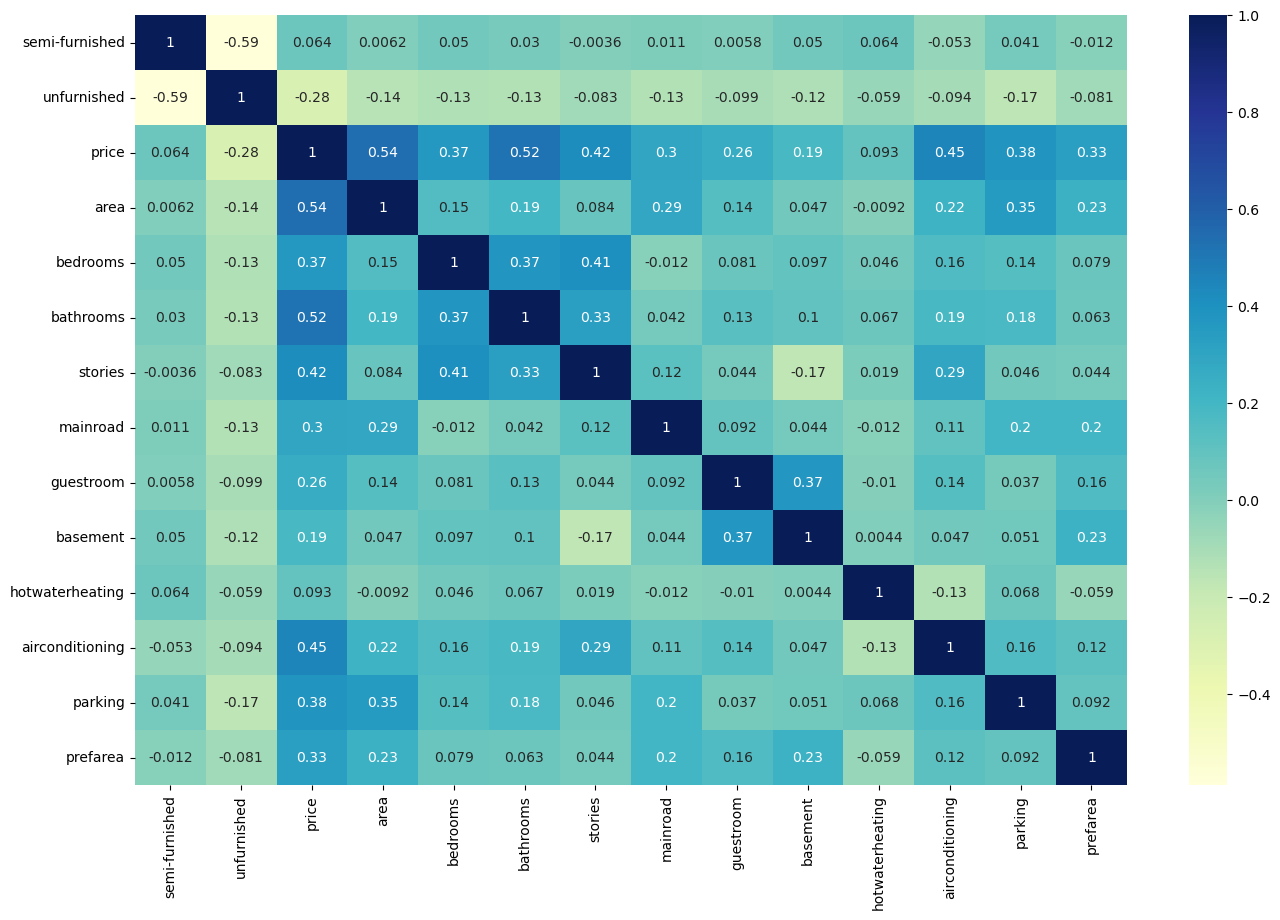

In [263]:
plt.figure(figsize = (16, 10))
sns.heatmap(df.corr(), annot=True, cmap='YlGnBu')

In [264]:
#Scaling

In [265]:
df_train, df_test = train_test_split(df, test_size=0.3, random_state=100)
print(df_train.shape, df_test.shape, df.shape)

(381, 14) (164, 14) (545, 14)


In [266]:
pd.concat([df_train[num_cols] , df_test[num_cols]], axis=1).describe()

price          area         price          area
count  3.810000e+02    381.000000  1.640000e+02    164.000000
mean   4.756848e+06   5116.900262  4.789686e+06   5228.695122
std    1.820366e+06   2061.660813  1.987485e+06   2408.283816
min    1.750000e+06   1836.000000  1.820000e+06   1650.000000
25%    3.500000e+06   3600.000000  3.395000e+06   3518.000000
50%    4.305000e+06   4500.000000  4.361000e+06   4787.500000
75%    5.740000e+06   6360.000000  5.757500e+06   6352.500000
max    1.330000e+07  13200.000000  1.225000e+07  16200.000000

In [267]:
scaler = MinMaxScaler()
df_train[num_cols] = scaler.fit_transform(df_train[num_cols])
df_test[num_cols] = scaler.transform(df_test[num_cols])

In [268]:
pd.concat([df_train[num_cols] , df_test[num_cols]], axis=1).describe()

price        area       price        area
count  381.000000  381.000000  164.000000  164.000000
mean     0.260333    0.288710    0.263176    0.298548
std      0.157607    0.181420    0.172077    0.211922
min      0.000000    0.000000    0.006061   -0.016367
25%      0.151515    0.155227    0.142424    0.148011
50%      0.221212    0.234424    0.226061    0.259724
75%      0.345455    0.398099    0.346970    0.397439
max      1.000000    1.000000    0.909091    1.263992

In [269]:
y_train = df_train.pop('price')
X_train = df_train
y_test = df_test.pop('price')
X_test = df_test

In [270]:
print(y_train.shape, X_train.shape, y_test.shape, X_test.shape)

(381,) (381, 13) (164,) (164, 13)


In [271]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [272]:
X_train_sm = sm.add_constant(X_train)
lm = sm.OLS(y_train, X_train_sm)
lr_model = lm.fit()
print(lr_model.summary())
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.681
Model:                            OLS   Adj. R-squared:                  0.670
Method:                 Least Squares   F-statistic:                     60.40
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           8.83e-83
Time:                        14:38:14   Log-Likelihood:                 381.79
No. Observations:                 381   AIC:                            -735.6
Df Residuals:                     367   BIC:                            -680.4
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -0.1209      0.026     

Features    VIF
0             const  31.43
2       unfurnished   1.65
1    semi-furnished   1.58
6           stories   1.48
3              area   1.38
4          bedrooms   1.37
9          basement   1.31
5         bathrooms   1.26
11  airconditioning   1.25
12          parking   1.24
8         guestroom   1.22
7          mainroad   1.18
13         prefarea   1.16
10  hotwaterheating   1.08

In [273]:
X = X_train.drop(['bedrooms', 'semi-furnished', 'bathrooms', 'mainroad'], axis=1)
X_train_sm = sm.add_constant(X)
lm = sm.OLS(y_train, X_train_sm)
lr_model = lm.fit()
print(lr_model.summary())
# Calculate the VIFs again for the new model
vif = pd.DataFrame()
vif['Features'] = X_train_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train_sm.values, i) for i in range(X_train_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.591
Method:                 Least Squares   F-statistic:                     62.13
Date:                Sat, 10 Jun 2023   Prob (F-statistic):           1.20e-68
Time:                        14:38:14   Log-Likelihood:                 338.93
No. Observations:                 381   AIC:                            -657.9
Df Residuals:                     371   BIC:                            -618.4
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               0.0123      0.016     

Features   VIF
0            const  9.79
2             area  1.30
5         basement  1.26
7  airconditioning  1.22
4        guestroom  1.21
8          parking  1.20
3          stories  1.16
9         prefarea  1.15
6  hotwaterheating  1.06
1      unfurnished  1.05

0.6011325940410388


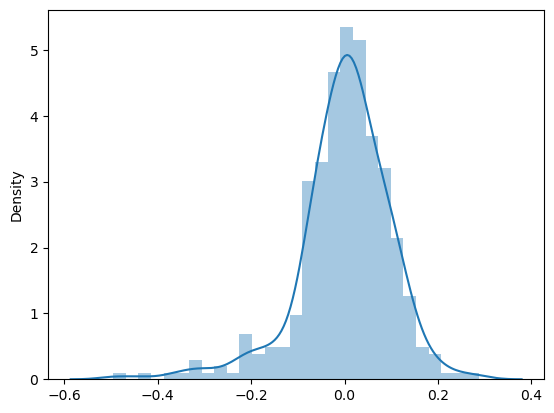

In [274]:
y_train_pred = lr_model.predict(X_train_sm)
res = y_train_pred - y_train
sns.distplot(res)
print(r2_score(y_train, y_train_pred))

Text(0, 0.5, 'y_train_pred')

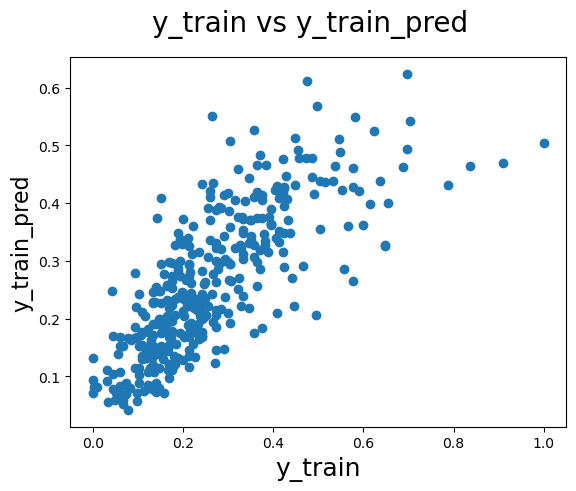

In [275]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)    

0.6360909559497143


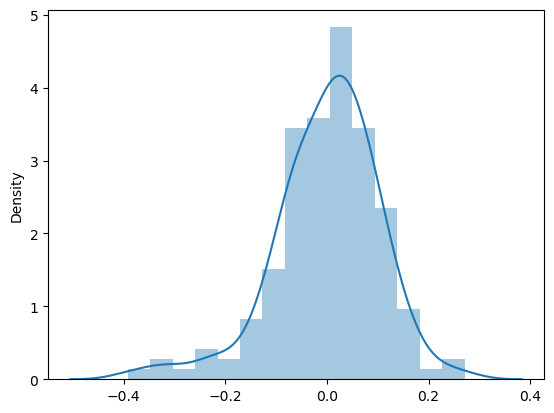

In [276]:
X_test_sm = sm.add_constant( X_test.drop(['bedrooms', 'semi-furnished', 'bathrooms', 'mainroad'], axis=1))
y_test_pred = lr_model.predict(X_test_sm)
res = y_test_pred - y_test
sns.distplot(res)
print(r2_score(y_test, y_test_pred))

Text(0, 0.5, 'y_pred')

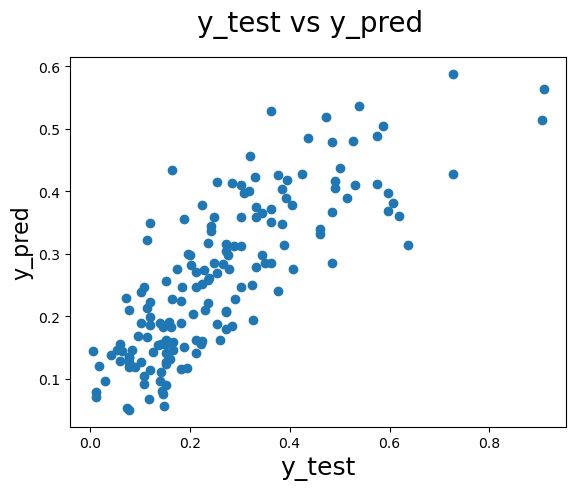

In [277]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)    

In [286]:
# Using DecisionTreeRegressor

In [279]:
dt = DecisionTreeRegressor(random_state=42, max_depth=4, min_samples_leaf=10)
dt.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=4, min_samples_leaf=10, random_state=42)

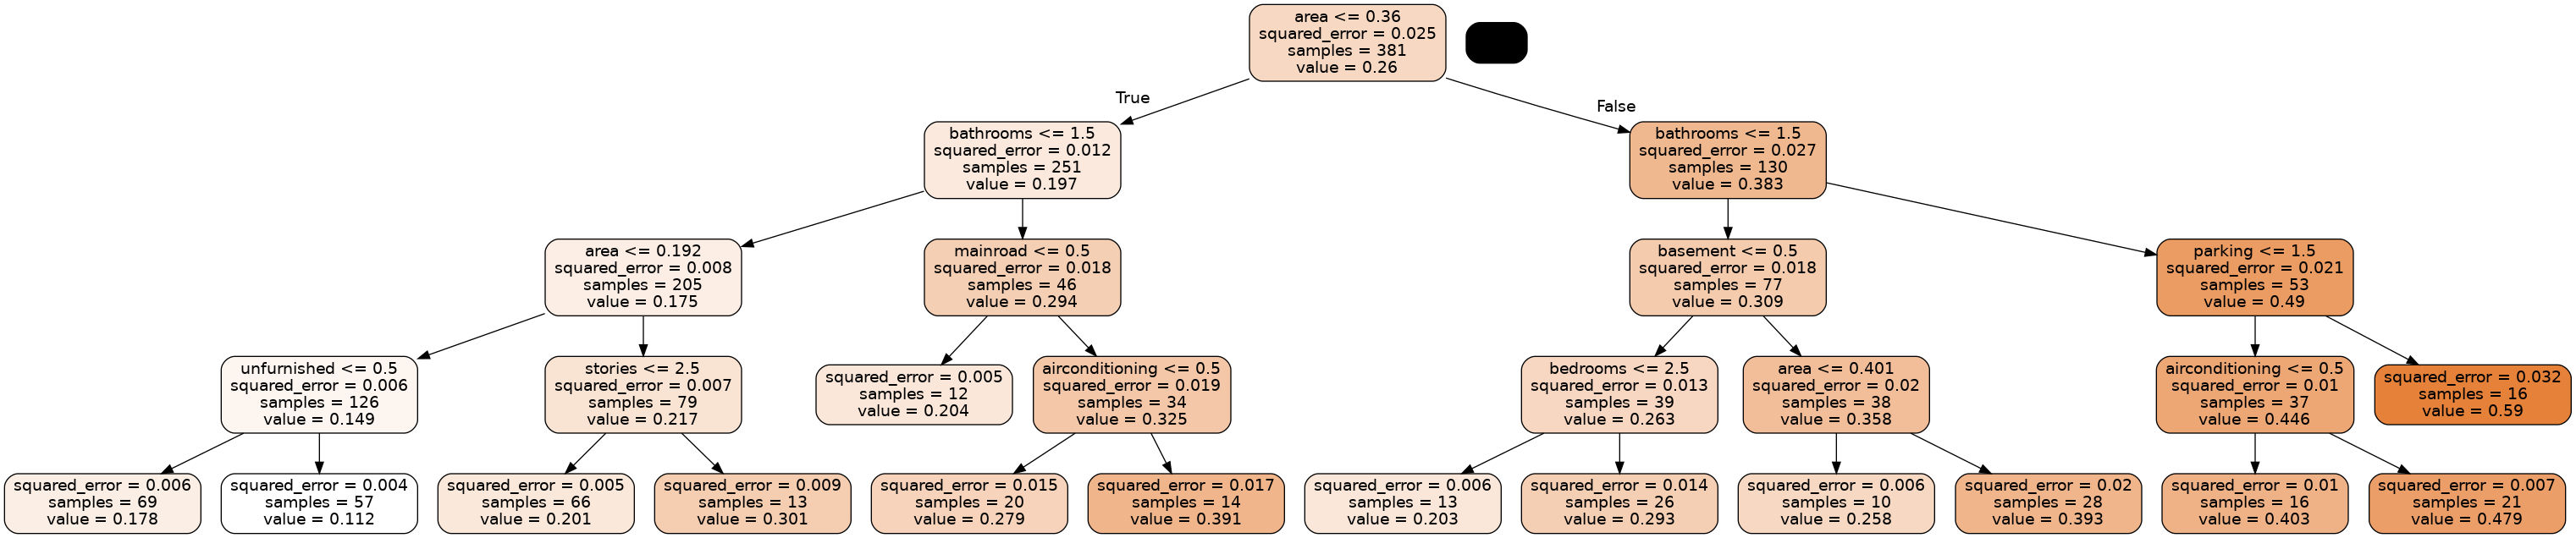

In [280]:
from IPython.display import Image
from six import StringIO
from sklearn.tree import export_graphviz
import pydotplus, graphviz

dot_data = StringIO()

export_graphviz(dt, out_file=dot_data, filled=True, rounded=True,
                feature_names=X_train.columns)

graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
Image(graph.create_png())


0.6234560022579934


<Axes: xlabel='price', ylabel='Density'>

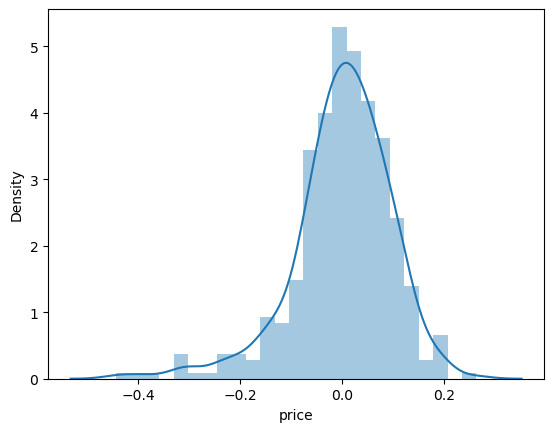

In [281]:
y_train_pred = dt.predict(X_train)
res = y_train_pred - y_train
print(r2_score(y_train, y_train_pred))
sns.distplot(res)

Text(0, 0.5, 'y_train_pred')

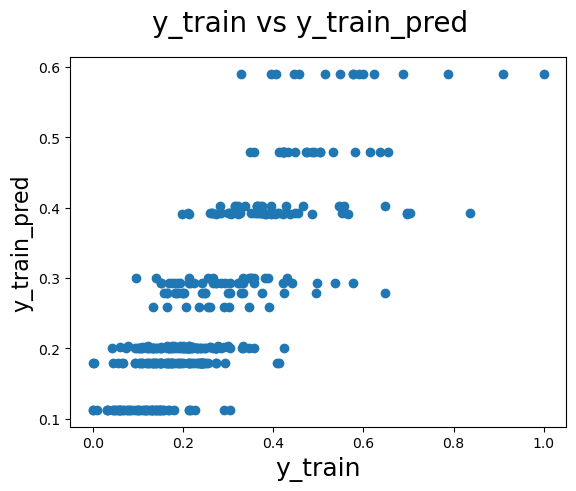

In [282]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_train, y_train_pred)
fig.suptitle('y_train vs y_train_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_train', fontsize = 18)                          # X-label
plt.ylabel('y_train_pred', fontsize = 16)    

0.5289772624972271


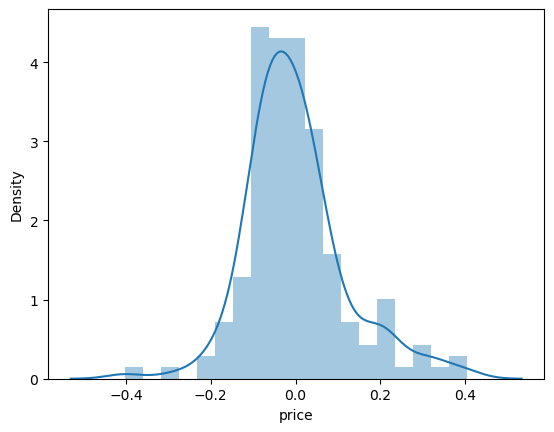

In [283]:
y_test_pred = dt.predict(X_test)
res =  y_test - y_test_pred
sns.distplot(res)
print(r2_score(y_test, y_test_pred))

Text(0, 0.5, 'y_pred')

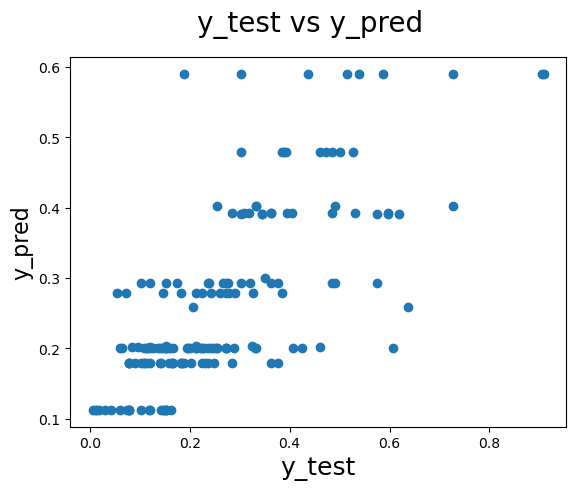

In [284]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 18)                          # X-label
plt.ylabel('y_pred', fontsize = 16)  